# Preprocessing

### A suite of preprocess toolkit

## Load Libraries

In [27]:
#
from util import *
from util.parser import *
from util.img_kit import *
from util.notebook_display import *
from IPython import display
import numpy as np
from scipy import ndimage
from scipy import misc
from os import walk
import os
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Resize Images

In [ ]:
# size = (256, 256)
size = (128, 128)
# img_folder = "data/moving-box/frames/ffmpeg"
img_folder = "data/moving-box/frames/moving-box-uniform/"
output = os.path.join(img_folder, "x".join([str(x) for x in size]))
# resize_all(img_folder, output, size)
# print("Images in {} resized to {}, \n         saved in {}".format(img_folder, str(size), output))

## Convert Images to Gray Scale

In [ ]:
folder = "data/moving-box/frames/moving-box-non-uniform"
imgs = imgs_in_folder(folder, "jpg")
sample = sample_and_show(imgs)
grayed = rgb2gray(sample)
print("original dim: {}".format(sample.shape))
print("grayed   dim: {}".format(grayed.shape))

In [ ]:
plt.axis('off')
ax = plt.subplot(1, 2, 1)
ax.set_aspect('equal')
disable_axis(ax)
plt.title("Original")
plt.imshow(sample)
ax = plt.subplot(1, 2, 2)
disable_axis(ax)
plt.title("Grayed")
plt.imshow(grayed)

## Compress and Save

In [ ]:
np.savez_compressed("tmp/grayed", imgs = grayed)
grayed_from_file = np.load("tmp/grayed.npz")['imgs']
print("Load img from file: shape = {}".format(grayed_from_file.shape))
plot_img(grayed_from_file)

## Reside All Images, Grayscale, Compress and Save

### Box

In [ ]:
def process_imgs_in_folder(folder, size, save_path, ext = "jpeg"):
    imgs = imgs_in_folder(folder, ext)
    resized_imgs = [resize(img, size) for img in imgs]
    grayed_imgs = [rgb2gray(img) for img in resized_imgs]
    processed = np.array(grayed_imgs)
    info = {"images:": folder.split("/")[-1], "dim": processed.shape}
    np.savez_compressed(save_path, imgs = processed, info = info)

In [ ]:
folder = "data/Exercise/test"
imgs = imgs_in_folder(folder, "png")
print("Images in folder: {}".format(len(imgs)))
size = (64, 64)
resized_imgs = [resize(img, size) for img in imgs]
print("resized shape:    {}".format(sample_img(resized_imgs).shape))
# grayed_imgs = [rgb2gray(img) for img in resized_imgs]
# print("grayed shape:     {}".format(sample_img(grayed_imgs).shape))

processed = np.array(resized_imgs)
print("Processed:        {}".format(processed.shape))
info = {"images:": "Exercise Test", "dim": processed.shape}

save_path = "data/exercise-test-{}".format("x".join(str(x) for x in size))
np.savez_compressed(save_path, imgs = processed, info = info)
print("Saved to:         {}".format(save_path))

## Process Exercise

In [ ]:
for name in ["%02d"%i for i in range(13, 21)]:
    folder = "data/Exercise/" + name
    imgs = imgs_in_folder(folder, "png")
    print("Images in folder: {}".format(len(imgs)))
    size = (64, 64)
    resized_imgs = [resize(img, size) for img in imgs]
    print("resized shape:    {}".format(sample_img(resized_imgs).shape))

    processed = np.array(resized_imgs)
    print("Processed:        {}".format(processed.shape))
    info = {"images:": "Exercise-Train-{}".format(name), "dim": processed.shape}

    save_path = "data/Exercise-Train-{}-{}".format(name, "x".join(str(x) for x in size))
    np.savez_compressed(save_path, imgs = processed, info = info)
    print("Saved to:         {}".format(save_path))

# Process Marple2

In [98]:
folder = "data/head/"
imgs = imgs_in_folder(folder, "jpg")
print("Images in folder: {}".format(len(imgs)))
size = (160, 256)
resized_imgs = [resize(img, size) for img in imgs]
print("resized shape:    {}".format(sample_img(resized_imgs).shape))

processed = np.array(resized_imgs)

Images in folder: 251
resized shape:    (160, 256, 3)


In [99]:
print("Processed:        {}".format(processed.shape))
info = {"images:": "Head", "dim": processed.shape}
save_path = "data/head-processed-{}".format("x".join(str(x) for x in size))
np.savez_compressed(save_path, imgs = processed, info = info)
print("Saved to:         {}".format(save_path))

Processed:        (251, 160, 256, 3)
Saved to:         data/head-processed-160x256


imgs shape:     (251, 160, 256, 3)
info:           {'images:': 'Head', 'dim': (251, 160, 256, 3)}


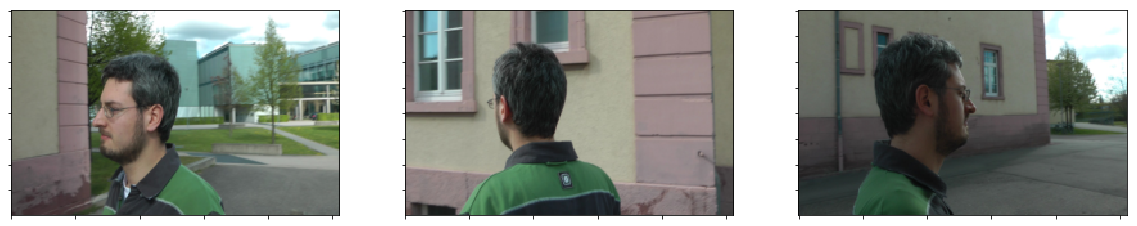

(3, 160, 256, 3)


In [101]:
data = np.load(save_path + ".npz")
imgs, info = data['imgs'], data['info']
print("imgs shape:     {}".format(imgs.shape))
print("info:           {}".format(info))
sample = sample_and_show_many(imgs, 3, size = (20, 8))
print(sample.shape)

## Process Tennis

In [ ]:
folder = "data/tennis"
imgs = imgs_in_folder(folder, "jpg")
print("Images in folder: {}".format(len(imgs)))
size = (160, 256)
resized_imgs = [resize(img, size) for img in imgs]
print("resized shape:    {}".format(sample_img(resized_imgs).shape))

processed = np.array(resized_imgs)\

In [ ]:
print(processed.shape)

In [ ]:
trains = [processed[:200], processed[280:]]
test = [processed[200:280]]
for i, train in enumerate(trains):
    print("Processed:        {}".format(train.shape))
    info = {"images:": "Tennis-train-{}".format(i+1), "dim": train.shape}
    save_path = "data/tennis-train-{}-{}".format(i+1, "x".join(str(x) for x in size))
    np.savez_compressed(save_path, imgs = processed, info = info)
    print("Saved to:         {}".format(save_path))

In [ ]:
for i, t in enumerate(test):
    print("Processed:        {}".format(t.shape))
    info = {"images:": "Tennis-test-{}".format(i+1), "dim": t.shape}
    save_path = "data/tennis-test-{}-{}".format(i+1, "x".join(str(x) for x in size))
    np.savez_compressed(save_path, imgs = processed, info = info)
    print("Saved to:         {}".format(save_path))

#### Test

In [ ]:
data = np.load(save_path + ".npz")
imgs, info = data['imgs'], data['info']
print("imgs shape:     {}".format(imgs.shape))
print("info:           {}".format(info))

In [ ]:
sample = sample_and_show_many(imgs, 3, size = (20, 8))
print(sample.shape)

In [ ]:
def resize_all(folder, output, size):
    folders = [f[0] for f in os.walk(folder)][1:]
    for f in folders:
        filename = f.split('/')[-1]
        process_imgs_in_folder(f, size, os.path.join(output, filename))
    
resize_all("data/moving-box/frames",  "data/moving-box/processed-64x64", (64, 64))

### Animation

In [ ]:
folder = "data/kid-swing"
imgs = imgs_in_folder(folder, "jpg")
print("Images in folder: {}".format(len(imgs)))
size = (64, 128) # (H, W)
resized_imgs = [resize(img, size) for img in imgs]
print("resized shape:    {}".format(sample_img(resized_imgs).shape))
grayed_imgs = [rgb2gray(img) for img in resized_imgs]
print("grayed shape:     {}".format(sample_img(grayed_imgs).shape))
processed = np.array(grayed_imgs)
print("Processed:        {}".format(processed.shape))
info = {"images:": "moving box uniform", "dim": processed.shape}

save_path = "data/Animation/kidSwing-{}".format("x".join(str(x) for x in size))
np.savez_compressed(save_path, imgs = processed, info = info)
print("Saved to:         {}".format(save_path))

In [ ]:
data = np.load(save_path + ".npz")
imgs, info = data['imgs'], data['info']
print("imgs shape:     {}".format(imgs.shape))
print("info:           {}".format(info))

In [ ]:
sample_and_show_many(imgs, 2)

# Uniform -> Accelerating

In [92]:
folder = "data/moving-box/AcceleratingBox/bigSquare-vertical/"
imgs = imgs_in_folder(folder, "jpeg")
print("Images in folder: {}".format(len(imgs)))
size = (128, 128)
resized_imgs = [resize(img, size) for img in imgs]
imgs = [rgb2gray(img) for img in resized_imgs]
print("resized shape:    {}".format(sample_img(imgs).shape))

imgs = np.array(imgs)

Images in folder: 56
resized shape:    (128, 128)


In [93]:
start_ind = 0
acc       = 1
n = imgs.shape[0]
remains = [start_ind]
last_gap = 1
while True:
    curr = remains[-1] + last_gap
    if curr >= n: break
    remains.append(curr)
    last_gap += 1
remains = remains[:-4]
imgs = imgs[remains]*255
imgs = imgs.astype('uint8')

In [94]:
remains

[0, 1, 3, 6, 10, 15, 21]

In [95]:
out_folder = "output/gif"
output = os.path.join(out_folder, "acc.gif")
gif_generated = gif.compile_frames_to_gif(imgs, output, duration=1)

print("GIF generated! {}".format(output))

GIF generated! output/gif/acc.gif


In [96]:
def display_gif(path, name, width=300):
    return display.HTML('<h3>{}</h3> <img src="{}", width={}>'.format(name, path, width))

In [97]:
display_gif(output, "GIF")